# El objetivo de este ejercicio es identificar los costos de un seguro basados en informacion relevante del solicitante

Para este caso utilizaremos las tecnias de preprocesamiento de datos (Los 6 Pasos fundamentales) y varios métodos de regresion lineal (Simple, multiple, polinomial)

In [47]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Hacemos la carga de la data

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
# Saltamos a la segunda fase la cual es realizar los estadisticos básicos

df.shape


(1338, 7)

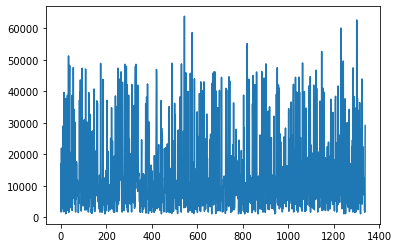

In [50]:
%matplotlib inline

plt.plot(df['charges'])

In [51]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Procedemos preparar las variables para la regresión lineal

1. creacion de variables dummy

In [52]:
dmdf = pd.get_dummies(df['sex'], prefix = 'Cat_Sex')

In [53]:
dmdf

,Cat_Sex_female,Cat_Sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [54]:
dmdf = dmdf.drop(['Cat_Sex_female'], axis = 1)

In [55]:
df = df.join(dmdf)

In [56]:
df = df.drop(['sex'], axis = 1)

In [57]:
dfdm = pd.get_dummies(df['smoker'], prefix = 'Cat_smoke')

In [58]:
dfdm =  dfdm.drop(['Cat_smoke_no'], axis = 1)

In [59]:
df = df.join(dfdm)

In [61]:
df = df.drop(['smoker'], axis = 1)

In [66]:
dfdm = pd.get_dummies(df['region'], prefix = 'region')

In [68]:
dfdm = dfdm.drop(['region_southwest'], axis = 1)

In [69]:
df = df.join(dfdm)

In [72]:
df = df.drop(['region'], axis = 1)

In [73]:
df

,age,bmi,children,charges,Cat_Sex_male,Cat_smoke_yes,region_northeast,region_northwest,region_southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,1,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1
1336,21,25.800,0,2007.94500,0,0,0,0,0


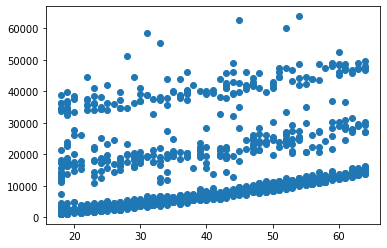

In [121]:
%matplotlib inline

plt.scatter(df['age'], df['charges'])


(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

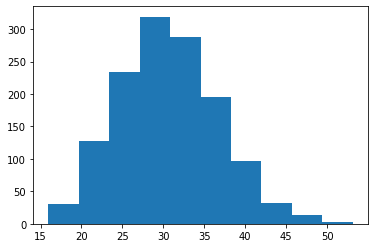

In [124]:
plt.hist(df['bmi'])

In [81]:
df.corr()
# Podemos observar que la variable smoke yes, está altamente correlacionada con los cargos del seguro

,age,bmi,children,charges,Cat_Sex_male,Cat_smoke_yes,region_northeast,region_northwest,region_southeast
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.138156,-0.135996,0.270025
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982
Cat_Sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117
Cat_smoke_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000


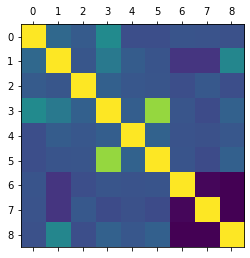

In [82]:
plt.matshow(df.corr())
# Acá creamos la matriz de correlacion

# Creacion del modelo de regresion lineal multiple

In [83]:
# definimos las variables X y y
feature_cols = ['age', 'bmi', 'children', 'charges', 'Cat_Sex_male', 'Cat_smoke_yes', 'region_northeast', 'region_northwest', 'region_southeast']

X = df[feature_cols]
y = df['charges']

In [86]:
# importamos las librerías para separar los conjuntos de testing y entrenamiento

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Separamos los conjuntos de entrenamiento y testing

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2 , random_state = 0)

In [92]:
# entrenar el modelo de regresion lineal

regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
y_pred = regression.predict(X_test)
y_pred

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

In [111]:
print('El R cuadrdo de este ejercicio es igual a:' + ' '+ str(regression.score(X_test, y_test)* 100) + '%')

El R cuadrdo de este ejercicio es igual a: 100.0%
